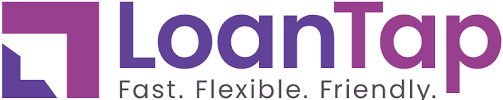

### `Context:`

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

**This case study will focus on the underwriting process behind Personal Loan only**

### `Problem Statement:`

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")                     #hide warnings

from colored import fg

In [2]:
#importing data
LoanTap = pd.read_csv("C:/Users/Rajeshri Jogi/Desktop/PROJECTS/Scaler/9. Logistic Regression_LoanTap/logistic_regression.csv") 

In [3]:
#check the head 
LoanTap.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
#check the shape
LoanTap.shape

(396030, 27)

In [5]:
#check the dtype, null valuess, size of data
LoanTap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
#check the statistical distribution of numerical features
LoanTap.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
LoanTap.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [8]:
#check total null values in the data
LoanTap.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
#check if any duplicated rows in the data
LoanTap.duplicated().value_counts()

False    396030
dtype: int64

# `2. Preprocessing the Data:`

In [10]:
#deep copy of oroginal data
df = LoanTap.copy(deep=True)

In [11]:
#check the column names
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [12]:
#remove the months string from term
df['term'] = df['term'].map(lambda x: x.rstrip('_months'))

In [13]:
df['term'].unique()

array([' 36 ', ' 60 '], dtype=object)

In [14]:
#check the unique values in the column
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [15]:
#removing the string from and + sign from column
df['emp_length'] = df['emp_length'].astype(str).str.replace('\D+', '')
df['emp_length'] = df['emp_length'].replace(r'^\s*$', np.nan, regex=True)
df["emp_length"].value_counts()

10    126041
1      57607
2      35827
3      31665
5      26495
4      23952
6      20841
7      20819
8      19168
9      15314
Name: emp_length, dtype: int64

In [16]:
#check the unique values in the column
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [17]:
#check the unique values in the column
df["verification_status"].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [18]:
#check the unique values in the column
df["issue_d"].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [19]:
#check the unique values in the column
df[['issue_month','issue_year']] = df['issue_d'].str.split('-',expand=True)
df.drop("issue_d", axis = 1, inplace = True)
df[['issue_month','issue_year']]
df.shape

(396030, 28)

In [20]:
#check the data type
df["issue_year"].dtype

dtype('O')

In [21]:
#checking the value counts of traget column
df["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [22]:
#check the unique values in the column
df["purpose"].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [23]:
#check the unique values in the column
df["dti"].unique()

array([26.24, 22.05, 12.79, ..., 40.56, 47.09, 55.53])

In [24]:
#check the unique values in the column
df["earliest_cr_line"].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [25]:
#remove the month from cloumn earliest credit line
df["earliest_cr_line"] = df["earliest_cr_line"].astype(str).str.replace('\D+', '')

In [26]:
#change the data type of the column
df["earliest_cr_line"] = df["earliest_cr_line"].astype("int32")

In [27]:
#check the unique values in the column
df["pub_rec"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  8.,  9., 10., 11.,  7., 19.,
       13., 40., 17., 86., 12., 24., 15.])

In [28]:
#check the unique values in the column
df["revol_bal"].unique()

array([ 36369.,  20131.,  11987., ...,  34531., 151912.,  29244.])

In [29]:
#check the unique values in the column
df["revol_util"].unique()

array([ 41.8 ,  53.3 ,  92.2 , ...,  56.26, 111.4 , 128.1 ])

In [30]:
#check the unique values in the column
df["total_acc"].unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

In [31]:
#check the unique values in the column
df["initial_list_status"].unique()

array(['w', 'f'], dtype=object)

In [32]:
#check the unique values in the column
df["application_type"].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [33]:
#check the unique values in the column
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [34]:
#check the unique values in the column
df["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [35]:
#check the unique values in the column
df["address"].nunique()

393700

# `3. EDA:`
## `Univariate Analysis:`

In [36]:
num_cols = ["loan_amnt", "int_rate", "installment", "annual_inc", "dti","earliest_cr_line","open_acc",
            "pub_rec", "revol_bal", "revol_util", "total_acc","mort_acc", "pub_rec_bankruptcies"]

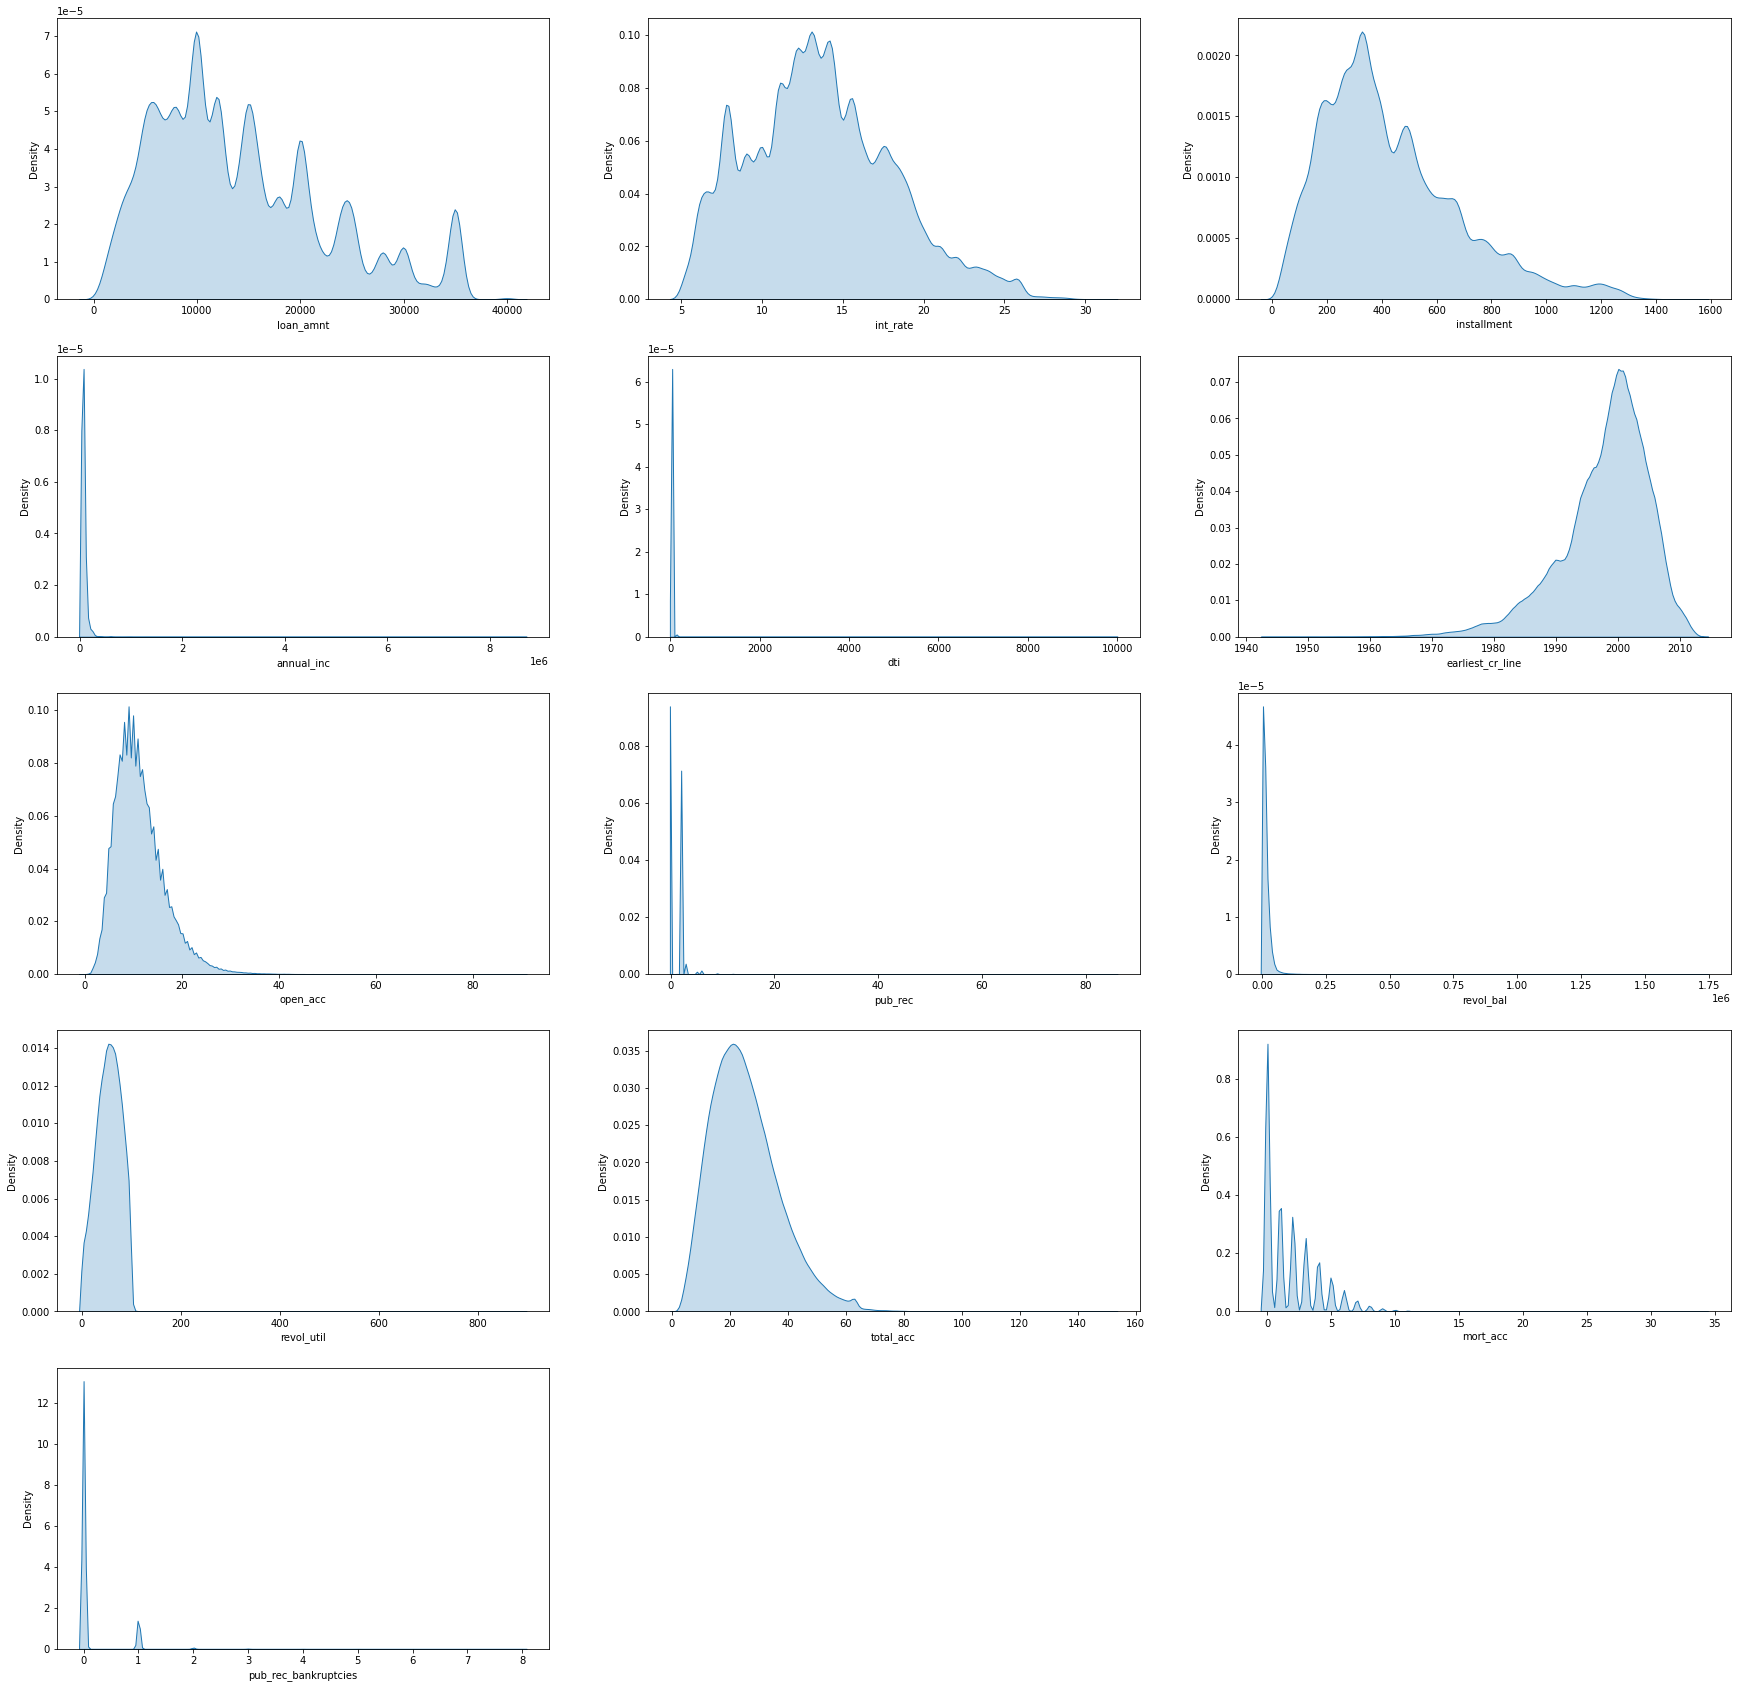

In [37]:
#run a function to get all kdeplot for all the num_cols
fig = plt.figure(figsize=(30, 30))
for plot in range(1, len(num_cols)+1):
    plt.subplot(5, 3, plot)
    sns.kdeplot(df[num_cols[plot-1]], shade = True)
plt.show()

`Inference:`
- most of the loan amount is between 75000 - 200000
- most of interest rate is aorund 15%
- most of the installment amount between 0 - 600
- annual income range is too high but most of the customer's income is around 10000

In [38]:
cat_cols = ["term","grade","sub_grade", "emp_title", "emp_length", "home_ownership", "verification_status", 
            "loan_status", "purpose","title","initial_list_status", "application_type", "issue_month","issue_year" ]

In [39]:
for col in cat_cols:
    print(df[col].value_counts())

 36     302005
 60      94025
Name: term, dtype: int64
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, 

In [117]:
ct = pd.crosstab(LoanTap["emp_title"],LoanTap["loan_status"])

In [119]:
ct.sort_values(by = ["Fully Paid"], ascending = False)

loan_status,Charged Off,Fully Paid
emp_title,,
Teacher,857,3532
Manager,929,3321
Registered Nurse,380,1476
RN,379,1467
Supervisor,405,1425
...,...,...
Plastic Surgery Coordinator,1,0
Kohls dept stores,1,0
CMOS Supervisor,1,0


In [122]:
ct["percent_paid"] = ct["Fully Paid"] / (ct["Fully Paid"] + ct["Charged Off"])
ct.sort_values(by = ["percent_paid", "Fully Paid"], ascending = False)

loan_status,Charged Off,Fully Paid,percent_paid
emp_title,,,
Senior Systems Administrator,0,28,1.0
Federal Bureau of Prisons,0,26,1.0
Judge,0,24,1.0
Stanford University,0,23,1.0
Capital One Bank,0,21,1.0
...,...,...,...
zevuloni & associates,1,0,0.0
zilkha residence,1,0,0.0
zms fashion,1,0,0.0


`Inference:`
- Loan term has only terms i.e 36 and 60 months
- Grade B is has the highest count
- Senior Systems Administrator and Federal Bureau of Prisons are the most trusted job titles

## `Bivariate Analysis:`

In [40]:
# Loan_Status
df["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["loan_status"] = label_encoder.fit_transform(df["loan_status"])

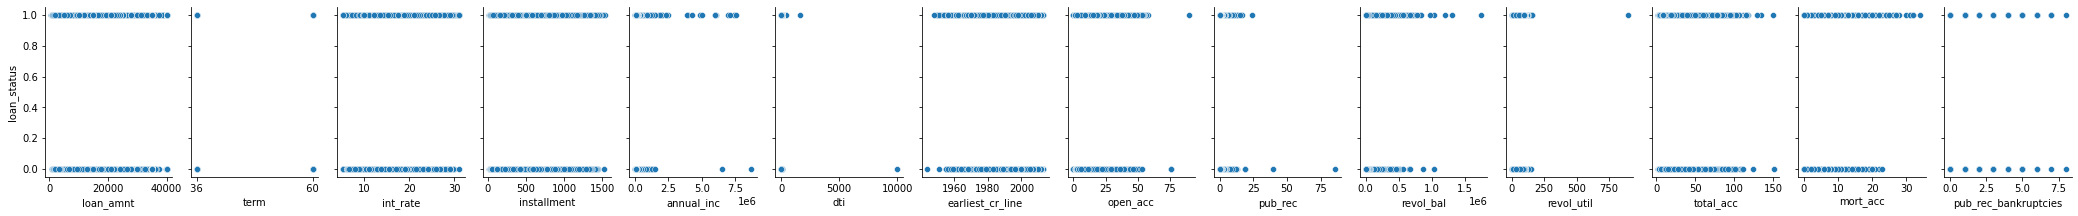

In [42]:
#Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=["loan_amnt","term", "int_rate", "installment", "annual_inc", "dti","earliest_cr_line","open_acc",
            "pub_rec", "revol_bal", "revol_util", "total_acc","mort_acc", "pub_rec_bankruptcies"], y_vars='loan_status',size=3, aspect=0.7, kind='scatter')

`Inference:`
- There is no linear correlation as such between numerical columns and loan status

<AxesSubplot:xlabel='grade', ylabel='count'>

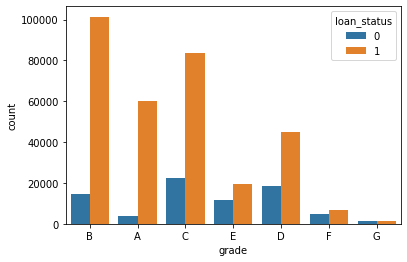

In [43]:
sns.countplot(data = df, x = "grade", hue = "loan_status")

`Inference:`
- Grade B has the highest fully paid proprtion
- Grade A is more trustable as it has least defaulters

In [44]:
cat_1 = df[["grade","sub_grade", "emp_length", "home_ownership", "verification_status"]]
cat_2 = df[["purpose","initial_list_status", "application_type", "issue_month","issue_year"]]

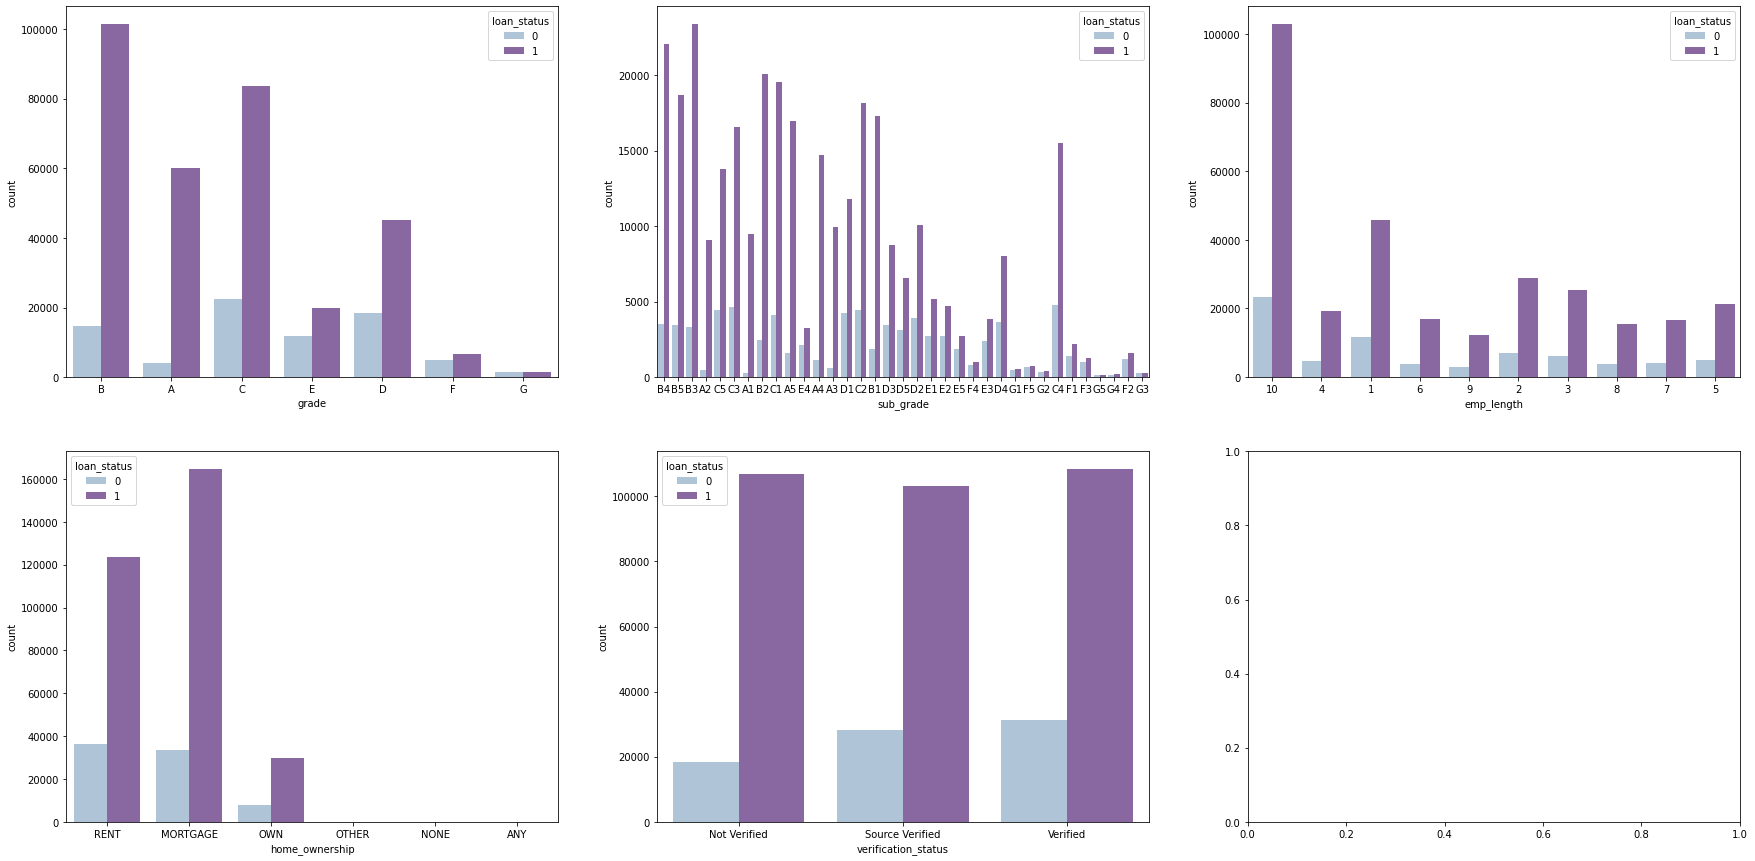

In [45]:
#countplot of categorical columns against Loan status 
fig , ax = plt.subplots(2,3,figsize = (30,15))     
for i , subplots in zip (cat_1, ax.flatten()):  
    sns.countplot(cat_1[i],hue = df['loan_status'],ax = subplots, palette = 'BuPu')
plt.show()

`Inference:`
- Verfication details does not play a vital role in prediction
- Customers who already have a mortgage loan are more likely pay the loan
- Customers with 10yrs experience are more likely to replay the loan

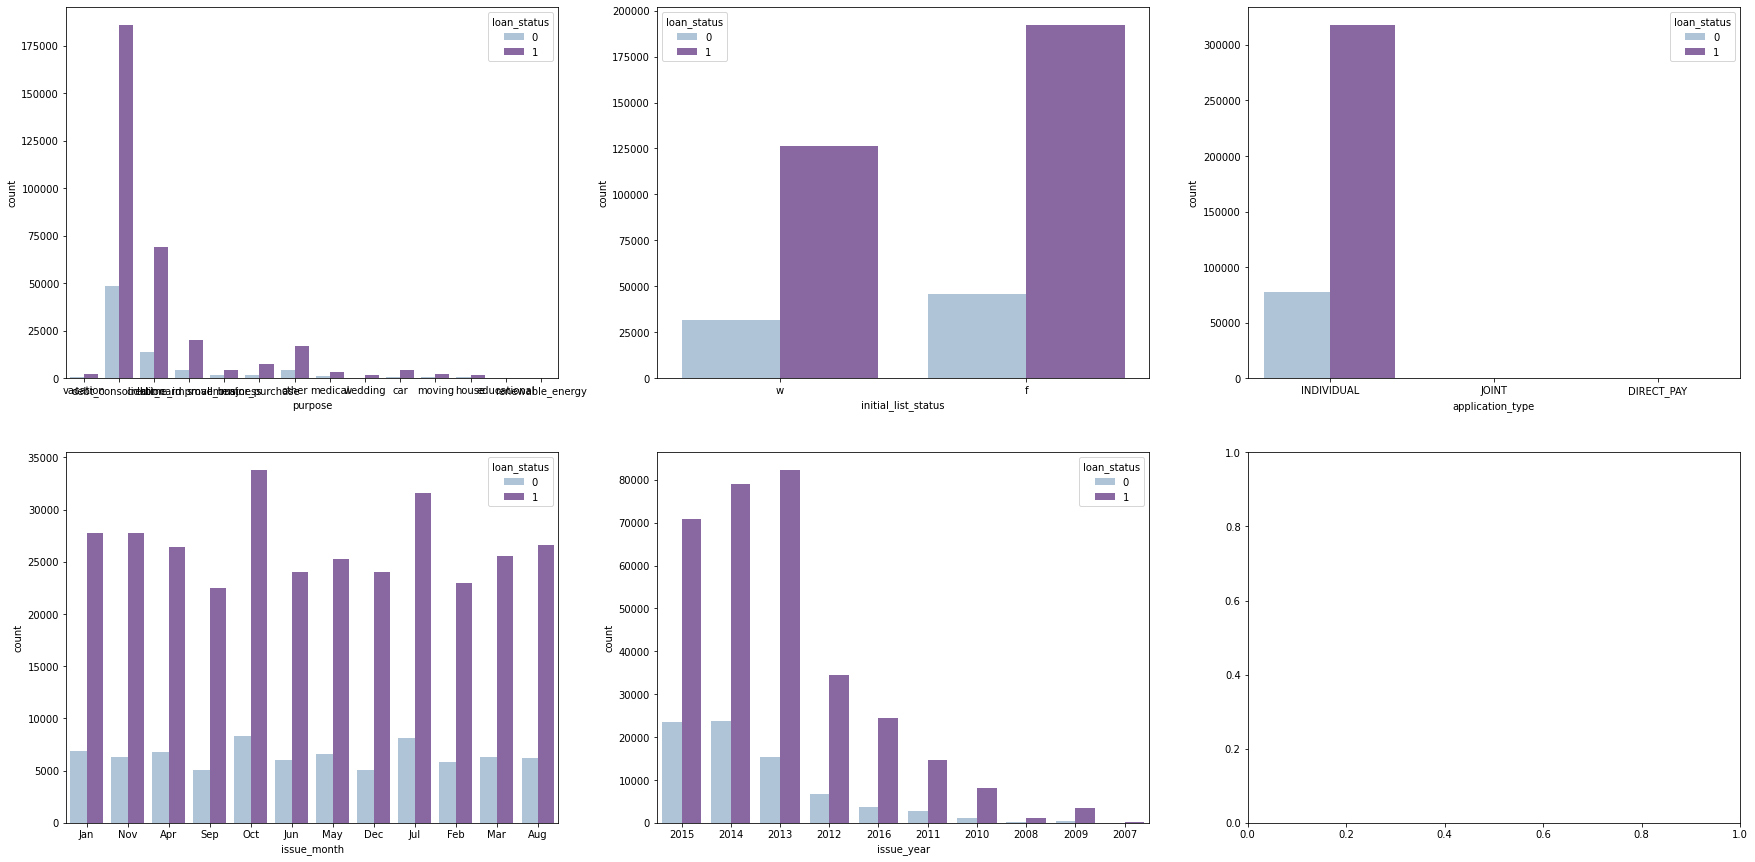

In [46]:
#countplot of categorical columns against Loan status 
fig , ax = plt.subplots(2,3,figsize = (30,15))     
for i , subplots in zip (cat_2, ax.flatten()):  
    sns.countplot(cat_2[i],hue = df['loan_status'],ax = subplots, palette = 'BuPu')
plt.show()

`Inference:`
- Highest loan are taken by the individuls
- Highest loans are issued in Oct month
- year 2013 is the most efficient year, as it has highest loan disbursed and least defaulters

## `Multivariate Analysis:`

<AxesSubplot:>

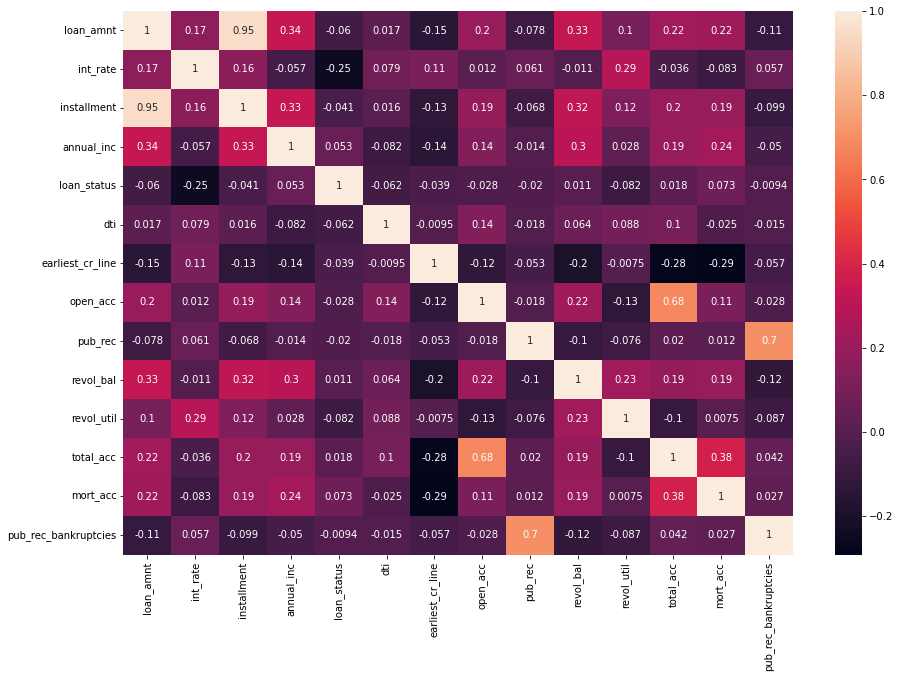

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

`Inference:`
- Highest correlation is seen between installment and loan amount
- then it is seen between pub_rec and pub_rec_bankruptcies
- then between total_acc and open_acc

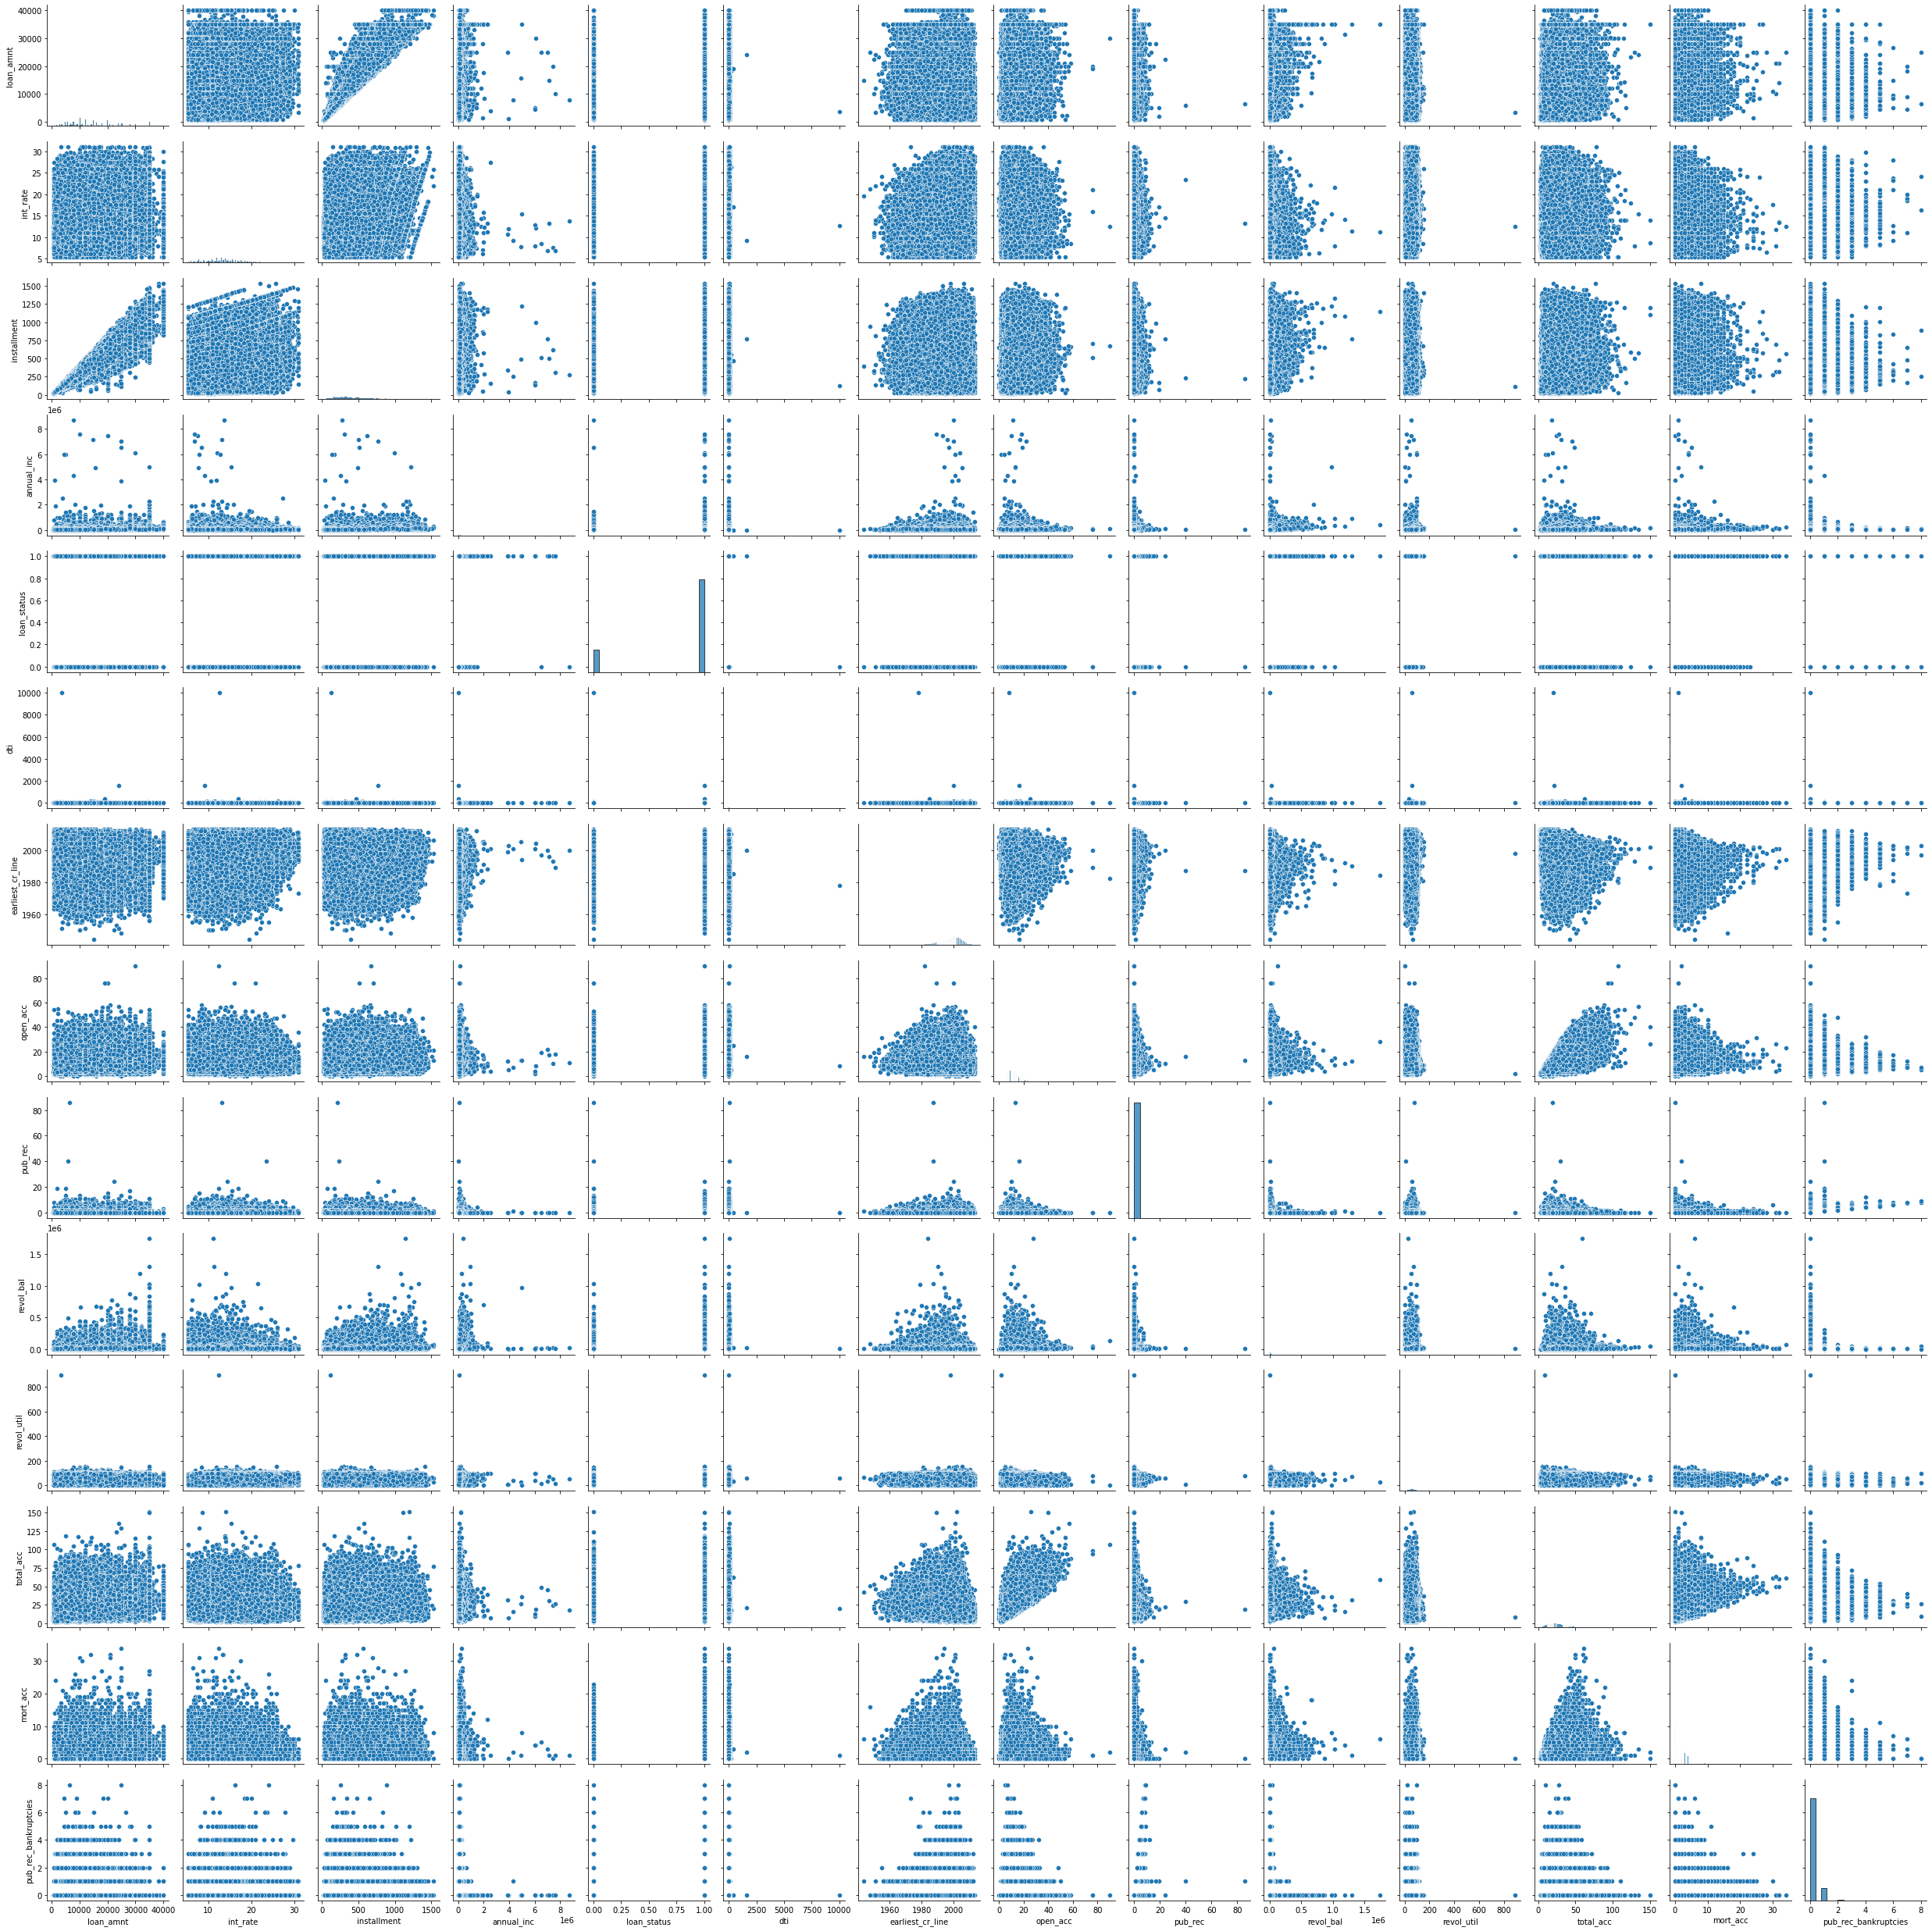

In [48]:
sns.pairplot(df)

`Insights:`
- Loan amount and Installation are related
- Total account and open account are related
- Earliest Credit line and no of mortgage account are negatively related
- Earliest Credit line and total account are negatively related

# `4. Outlier and Missing value treatment:`

### `Outlier treatment:`

In [49]:
#detecting outliers
def detect_outliers(df,col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    outlier = df.loc[(df[col] < lb) | (df[col] > ub)]
    return np.round(outlier.shape[0]/df.shape[0]*100)

In [50]:
print(num_cols)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


In [51]:
#print outliers for all numerical columns
print(f'Outliers percentages')
#print(f"Loan Amount = {detect_outliers(df,'loan_amnt')}%")
print(f"Loan Amount           = {detect_outliers(df, 'loan_amnt')}%")
print(f"Interest Rate         = {detect_outliers(df, 'int_rate')}%")
print(f"Installment           = {detect_outliers(df, 'installment')}%")
print(f"Annual Income         = {detect_outliers(df, 'annual_inc')}%")
print(f"dti                   = {detect_outliers(df, 'dti')}%")
print(f"Earliest Credit Line  = {detect_outliers(df, 'earliest_cr_line')}%")
print(f"Open acc              = {detect_outliers(df, 'open_acc')}%")
print(f"Pub rec               = {detect_outliers(df, 'pub_rec')}%")
print(f"Revol bal             = {detect_outliers(df, 'revol_bal')}%")
print(f"Revol util            = {detect_outliers(df, 'revol_util')}%")
print(f"Total acc             = {detect_outliers(df, 'total_acc')}%")
print(f"Mort acc              = {detect_outliers(df, 'mort_acc')}%")
print(f"Pub rec bankruptcies  = {detect_outliers(df, 'pub_rec_bankruptcies')}%")

Outliers percentages
Loan Amount           = 0.0%
Interest Rate         = 1.0%
Installment           = 3.0%
Annual Income         = 4.0%
dti                   = 0.0%
Earliest Credit Line  = 3.0%
Open acc              = 3.0%
Pub rec               = 15.0%
Revol bal             = 5.0%
Revol util            = 0.0%
Total acc             = 2.0%
Mort acc              = 0.0%
Pub rec bankruptcies  = 0.0%


In [52]:
#Outliers Treatment
def print_outliers(df, col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    print(f'Lower bound: {lb.round(2)}')
    print(f'Upper bound: {ub.round(2)}')
    return df.loc[(df[col] < lb) | (df[col] > ub)]

In [53]:
#outliers for interest rate
print_outliers(df, 'int_rate')

Lower bound: 1.49
Upper bound: 25.49


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_month,issue_year
96,12625.0,60,25.78,376.36,F,F5,Nursing Assistant,7,MORTGAGE,43000.0,...,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\r\nEast Janice, MT 00813",Jul,2015
97,13400.0,60,25.83,399.86,G,G2,DESIGNER,10,MORTGAGE,56000.0,...,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\r\nJacksonstad, MI 93700",Nov,2014
133,13075.0,60,27.31,401.68,G,G2,Clerk-specialist level,10,MORTGAGE,54777.0,...,3845.0,59.2,27.0,f,INDIVIDUAL,2.0,0.0,1532 Gill Greens Apt. 236\r\nSouth Cassandrafu...,Sep,2015
168,11800.0,60,28.99,374.49,G,G5,NaN,NaN,RENT,44011.0,...,6313.0,67.2,13.0,f,INDIVIDUAL,0.0,1.0,3019 Smith Manors Suite 402\r\nLake Anthonybur...,Jan,2016
204,34350.0,60,28.99,1090.13,G,G5,Quality improvement data analyst,3,RENT,84000.0,...,8400.0,85.7,23.0,w,INDIVIDUAL,0.0,1.0,"5050 Gomez Mill Suite 557\r\nEast Adamton, SD ...",Mar,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395425,14750.0,60,28.99,468.11,G,G5,Executive Recruiter,10,MORTGAGE,41000.0,...,1153.0,25.6,39.0,w,INDIVIDUAL,3.0,1.0,"3210 Mcintyre Way\r\nSouth Christophermouth, S...",Aug,2015
395475,13075.0,60,26.57,395.90,F,F5,maintenance lead,10,MORTGAGE,75000.0,...,6625.0,69.7,8.0,w,INDIVIDUAL,1.0,0.0,"PSC 1199, Box 5197\r\nAPO AP 29597",May,2016
395566,10875.0,60,26.77,330.58,G,G1,Operator,9,RENT,32000.0,...,9515.0,63.4,10.0,w,INDIVIDUAL,0.0,0.0,050 Shepard Ports Apt. 401\r\nEast Matthewland...,Jun,2015
395628,14400.0,60,25.88,430.13,F,F4,Staff Accountant,2,RENT,36300.0,...,3014.0,27.7,27.0,w,INDIVIDUAL,0.0,0.0,"04514 Walter Park Apt. 200\r\nLake Richardton,...",Apr,2016


In [54]:
#imputing outlier
df.loc[(df["int_rate"]<1.49), "int_rate"] = 1.49
df.loc[(df["int_rate"]>25.49), "int_rate"] = 25.49

In [55]:
print_outliers(df, 'installment')

Lower bound: -225.12
Upper bound: 1042.75


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_month,issue_year
11,35000.0,36,14.64,1207.13,C,C3,Director Bureau of Equipment Inventory,8,MORTGAGE,130000.00,...,81263.0,18.7,61.0,w,INDIVIDUAL,4.0,0.0,"3126 Sean Dale Apt. 141\r\nSouth Matthew, MS 0...",May,2014
18,34000.0,36,7.90,1063.87,A,A4,Pilot,10,RENT,130580.00,...,8767.0,11.9,36.0,f,INDIVIDUAL,3.0,0.0,"254 Mary Ferry\r\nPort Kirstenborough, CO 70466",Jan,2014
57,35000.0,36,14.16,1198.94,C,C2,Administrator,9,MORTGAGE,118497.84,...,8148.0,83.1,59.0,f,INDIVIDUAL,3.0,0.0,"578 Smith View Suite 106\r\nMiguelfort, IN 29597",Mar,2014
95,30000.0,36,16.49,1061.99,D,D3,Sergeant Major,10,RENT,101000.00,...,6080.0,76.0,15.0,f,INDIVIDUAL,2.0,1.0,"2528 Herrera Track Suite 897\r\nSavannahburgh,...",Nov,2014
103,30000.0,36,15.31,1044.52,C,C2,Alice G. Alatorre DDS.,9,MORTGAGE,108000.00,...,19430.0,84.8,15.0,w,INDIVIDUAL,0.0,0.0,"453 Murray Stream\r\nSouth Cathyfort, IL 93700",Dec,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395828,35000.0,36,14.09,1197.75,B,B5,Peoples Bank,10,MORTGAGE,120000.00,...,36748.0,82.6,19.0,w,INDIVIDUAL,6.0,0.0,"780 Carla Point\r\nKristenmouth, AL 30723",Dec,2012
395836,35000.0,36,12.99,1179.12,B,B4,Director,2,RENT,160000.00,...,35383.0,29.2,34.0,w,INDIVIDUAL,2.0,0.0,"567 Nicholas Brook Apt. 814\r\nLarsenville, IL...",Dec,2013
395909,32500.0,36,18.99,1191.16,E,E1,Asst Project Manager,3,OWN,65000.00,...,30198.0,84.1,16.0,f,INDIVIDUAL,0.0,0.0,"717 Villarreal Ridge\r\nLloydport, NV 70466",Oct,2014
395964,31300.0,36,18.85,1144.97,D,D3,Digidesign,6,RENT,78300.00,...,31779.0,46.7,28.0,w,INDIVIDUAL,0.0,0.0,"076 Aguilar Loop Apt. 994\r\nLake Dianeland, M...",Jul,2013


### `Treating missing values:`

In [56]:
#get the perenatge of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [57]:
percent_missing

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
issue_month             0.000000
issue_year              0.000000
dtype: float64

In [58]:
#imputing title coloumn with other
df['title'] = df['title'].fillna('Other')

In [59]:
#feature engineering of the column
df.loc[(df["pub_rec_bankruptcies"] > 1.0),"pub_rec_bankruptcies"] = 1

In [60]:
#imputing the null values of public rec bankruptcies
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna(0)

In [61]:
df["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

### `Simple Imputer:`

In [62]:
# median imputation for numerical columns
from sklearn.impute import SimpleImputer
num_missing = ["emp_length", "mort_acc","revol_util"]

median_imputer = SimpleImputer(strategy = 'median')
for col in num_missing:
    df[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(df[col])))

# `5. Feature Engineering:`
#### Lable Encoding, Target Encoding, One Hot Encoding

In [63]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type',
 'address',
 'issue_month',
 'issue_year']

`Label Encoding:`

In [64]:
df["pub_rec_bankruptcies"].value_counts()

0.0    350915
1.0     45115
Name: pub_rec_bankruptcies, dtype: int64

In [65]:
#label encoding is used where order or rank matters
label_enco = df[["term","grade"]]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["term"] = label_encoder.fit_transform(df["term"])
df["grade"] = label_encoder.fit_transform(df["grade"])

In [66]:
!pip install category_encoders

You should consider upgrading via the 'C:\Users\Rajeshri Jogi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [67]:
#target encoding for the columns which are dicrete in nature
from category_encoders import TargetEncoder
te = TargetEncoder()

df['sub_grade'] = te.fit_transform(df['sub_grade'], df["loan_status"])
df['emp_title'] = te.fit_transform(df['emp_title'],df["loan_status"])
df['purpose'] = te.fit_transform(df['purpose'],df["loan_status"])
df['title'] = te.fit_transform(df['title'],df["loan_status"])
df.drop("address",axis = 1, inplace =True)

In [69]:
#one hot encoding is used where no quantative values, just discrete info is provided
one_hot = df[["home_ownership","verification_status","initial_list_status","application_type"]]
dummies_1 = pd.get_dummies(one_hot, drop_first = True)

df = df.drop(["home_ownership","verification_status","initial_list_status","application_type"], axis = 1)
df = pd.concat([df,dummies_1],axis = 1)

In [70]:
#change the dtype
df["issue_year"] = df["issue_year"].astype("int32")

In [71]:
#flags for more than 1 and 0
df.loc[(df["pub_rec"] > 1.0),"pub_rec"] = 1
df.loc[(df["mort_acc"] > 1.0),"mort_acc"] = 1

In [72]:
#no of years since first credit taken
df["years_since_first_credit_line"] = df["issue_year"] - df["earliest_cr_line"]

In [73]:
#new feature based on monthly income and EMI
df["able_to_pay_loan"] = (df["annual_inc"]/12 *0.1 > (df['installment'])).astype('int')

In [74]:
#new feature created on the basis of annual income and installment
df["able_to_pay_loan"].value_counts()

1    281657
0    114373
Name: able_to_pay_loan, dtype: int64

<AxesSubplot:xlabel='able_to_pay_loan', ylabel='count'>

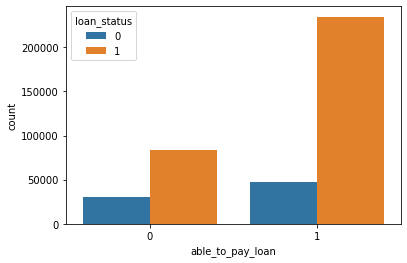

In [75]:
sns.countplot(x='able_to_pay_loan', data = df, hue = 'loan_status')

In [76]:
#change the dtype from month in variable to number
df["issue_month"] = pd.to_datetime(df.issue_month, format = "%b").dt.month

# `6. Check the correlation:`

<AxesSubplot:>

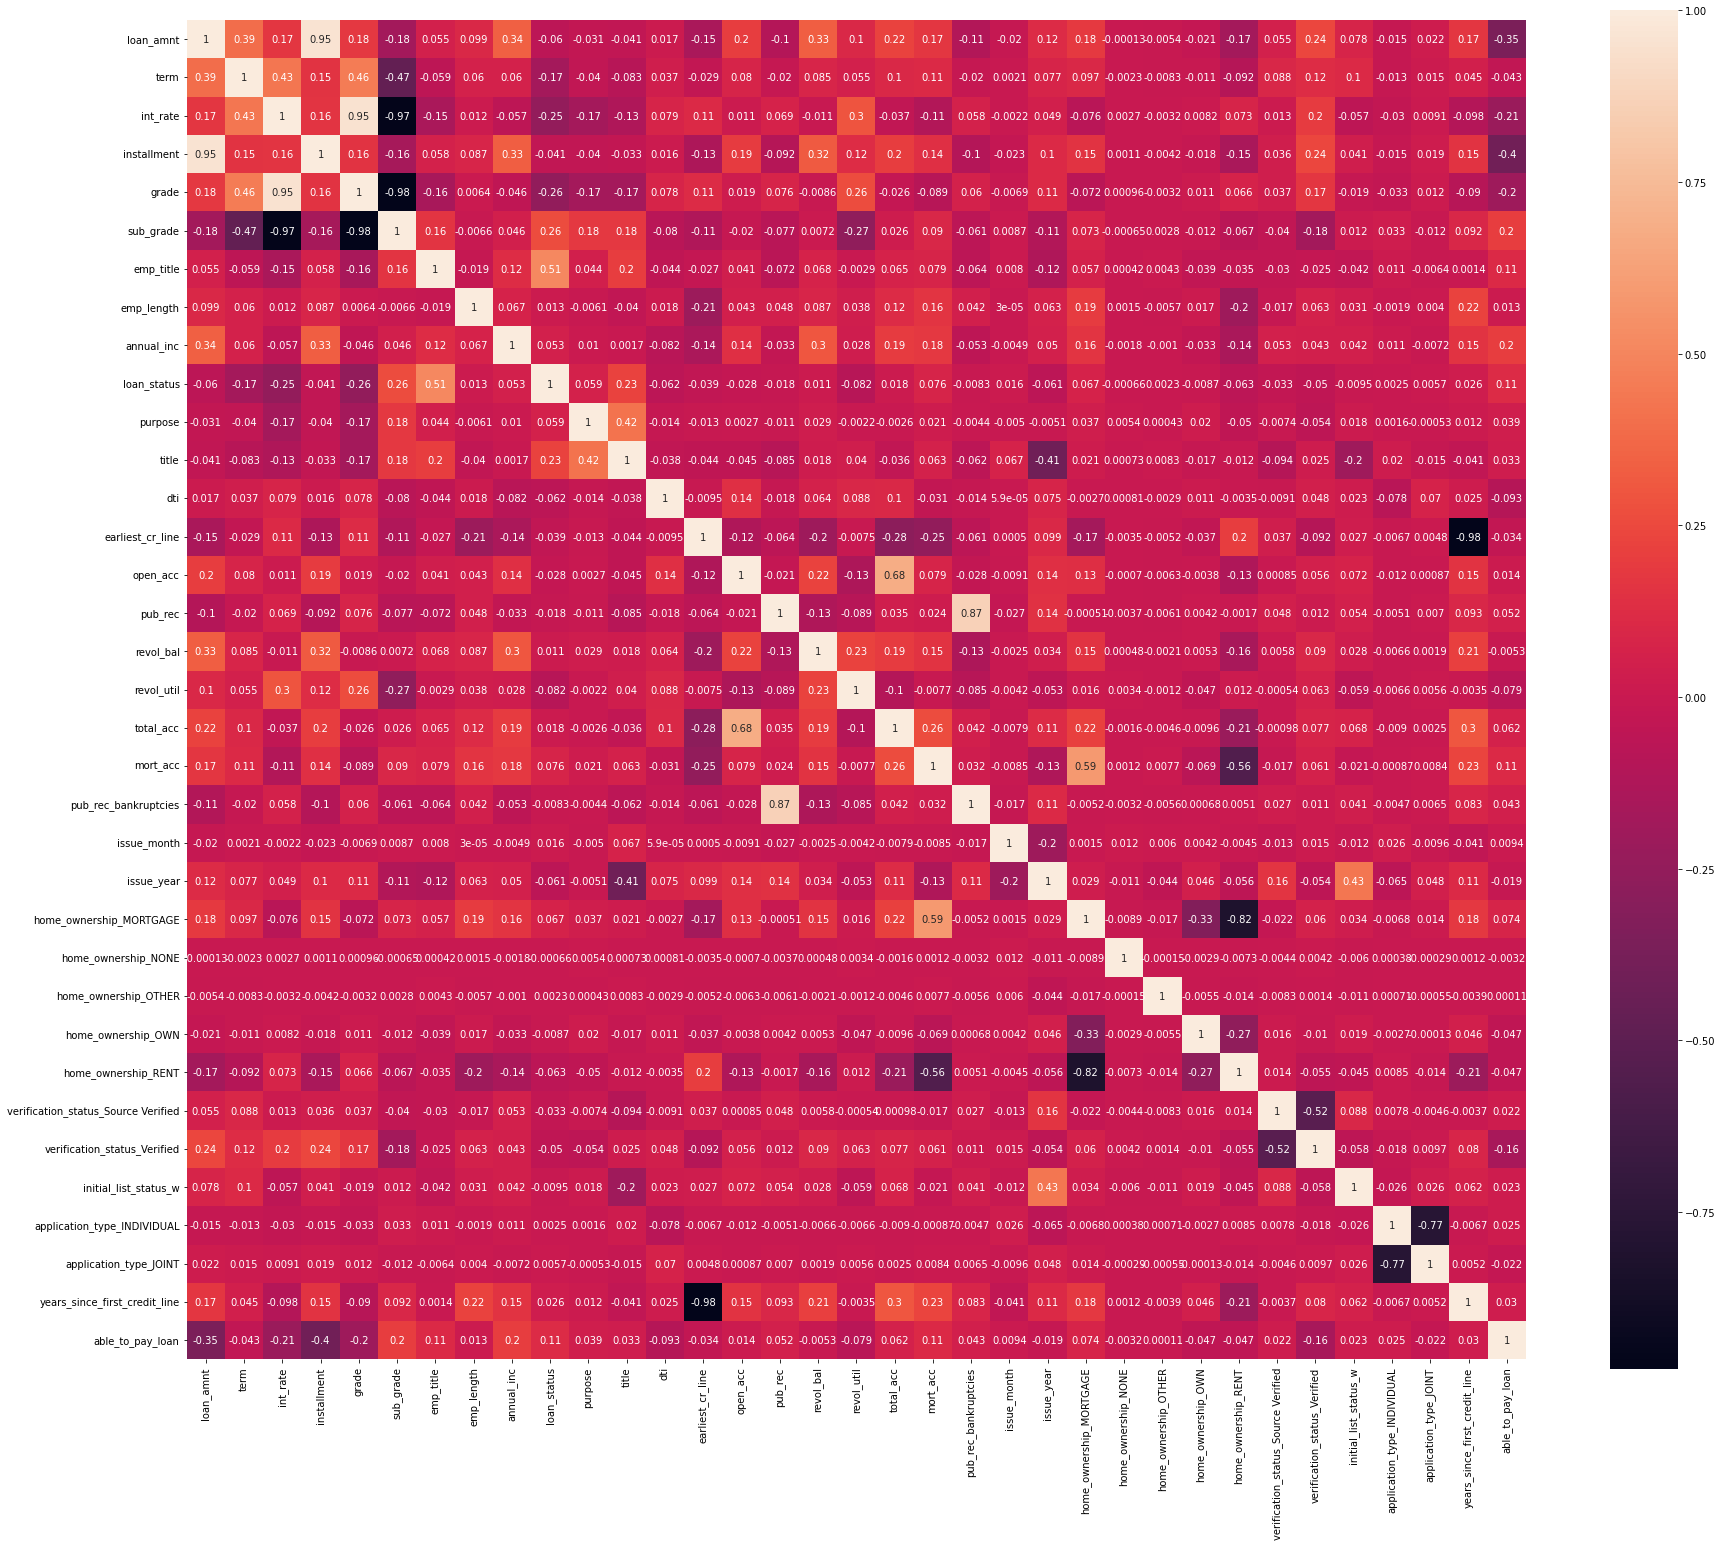

In [77]:
#correalation of all the features
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(method='pearson'), square=True,annot=True)

`Inference:`
- Grade and interest rate are highly related

# `7. Data Preparation:`

In [78]:
#getting X and y data from Dataframe
X = df.drop("loan_status", axis = 1)
y = df["loan_status"]

In [79]:
X

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,purpose,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,years_since_first_credit_line,able_to_pay_loan
0,10000.0,0,11.44,329.48,1,0.861607,0.752860,10.0,117000.0,0.810767,...,0,0,1,0,0,1,1,0,25,1
1,8000.0,0,11.99,265.68,1,0.844963,0.782678,4.0,65000.0,0.792586,...,0,0,0,0,0,0,1,0,11,1
2,15600.0,0,10.49,506.97,1,0.876646,0.808007,1.0,43057.0,0.832882,...,0,0,1,1,0,0,1,0,8,0
3,7200.0,0,6.49,220.65,0,0.951814,0.829389,6.0,54000.0,0.832882,...,0,0,1,0,0,0,1,0,8,1
4,24375.0,1,17.27,609.33,2,0.754933,0.699281,9.0,55000.0,0.832882,...,0,0,0,0,1,0,1,0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,217.38,1,0.861607,0.829389,2.0,40000.0,0.792586,...,0,0,1,1,0,1,1,0,11,1
396026,21000.0,0,12.29,700.42,2,0.826304,0.779570,5.0,110000.0,0.792586,...,0,0,0,1,0,0,1,0,9,1
396027,5000.0,0,9.99,161.32,1,0.901418,0.731997,10.0,56500.0,0.792586,...,0,0,1,0,1,0,1,0,16,1
396028,21000.0,1,15.31,503.02,2,0.802480,0.829389,10.0,64000.0,0.792586,...,0,0,0,0,1,0,1,0,22,1


In [80]:
#check the data shape
print(X.shape)
print(y.shape)

(396030, 34)
(396030,)


In [81]:
#split the data for further modeling
from sklearn.model_selection import train_test_split
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.25, random_state=42)

In [82]:
#check the data shape
X_train.shape, X_val.shape, X_test.shape

((237618, 34), (79206, 34), (79206, 34))

In [83]:
#check the data shape
y_train.shape, y_val.shape, y_test.shape

((237618,), (79206,), (79206,))

In [84]:
#standarize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#learn mu and sigma from Train Data
scaler.fit(X_train)

#apply learnt mu and sigma to all three data X datasets
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [85]:
#building the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()      #default c=1, lamda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
#accuracy of the model
model.score(X_train, y_train)

0.8638066139770556

In [87]:
#check on validation data
model.score(X_val, y_val)

0.866310633032851

In [88]:
model.coef_

array([[-5.09963501e-02, -2.41982393e-01,  4.26098692e-02,
        -6.89621517e-02, -2.12484414e-03,  4.30469260e-01,
         1.31977708e+00,  7.04459609e-02, -1.49086125e-02,
        -2.46829161e-01,  6.18360006e-01, -4.87472222e-01,
         2.40881020e-02, -1.82340761e-01, -4.27901869e-02,
         4.90602272e-02, -1.78601761e-01,  6.37902576e-02,
         5.27911150e-02,  6.76660064e-02,  6.54059776e-02,
         2.78472840e-01,  6.18726539e-02,  2.19076353e-03,
        -1.08942638e-03,  1.16094927e-02, -7.58706933e-02,
        -4.22585327e-02, -3.47338078e-02,  4.62376448e-02,
        -2.64651793e-02,  2.04715816e-02,  3.29803447e-02,
         1.70009913e-02]])

In [89]:
np.argmax(model.coef_)

6

### <span style="color:red"> >> emp_title is the most important feature. </span>

In [90]:
# Create lists
column_labels = X.columns.tolist()
coef = model.coef_.squeeze().tolist()

# Zip together
labels_coef = list(zip(column_labels, coef))

# Verify the result
print(labels_coef)

def Sort_Tuple(tup):
    tup.sort(key = lambda x: x[1])
    return tup

# printing the sorted list of tuples
print(Sort_Tuple(labels_coef))

[('loan_amnt', -0.050996350114234416), ('term', -0.24198239314891473), ('int_rate', 0.04260986924932281), ('installment', -0.06896215171202079), ('grade', -0.0021248441378905226), ('sub_grade', 0.4304692595419995), ('emp_title', 1.3197770781654317), ('emp_length', 0.0704459609248204), ('annual_inc', -0.014908612466148257), ('purpose', -0.2468291606264838), ('title', 0.6183600058849552), ('dti', -0.487472222382484), ('earliest_cr_line', 0.024088101972259943), ('open_acc', -0.18234076133058658), ('pub_rec', -0.042790186922681876), ('revol_bal', 0.049060227240926214), ('revol_util', -0.178601761074291), ('total_acc', 0.06379025758763264), ('mort_acc', 0.05279111504295618), ('pub_rec_bankruptcies', 0.06766600635828769), ('issue_month', 0.06540597757685268), ('issue_year', 0.2784728395937377), ('home_ownership_MORTGAGE', 0.0618726539164864), ('home_ownership_NONE', 0.002190763533323889), ('home_ownership_OTHER', -0.0010894263784024256), ('home_ownership_OWN', 0.011609492710148975), ('home_o

### Coefficient's and column names:
`'emp_title'               1.32
'title'                    0.62
'sub_grade'                0.43
'issue_year'               0.28
'emp_length'               0.07
'pub_rec_bankruptcies'     0.07
'issue_month'              0.06
'total_acc'                0.06
'home_ownership_MORTGAGE'  0.06
'mort_acc'                 0.05
'revol_bal'                0.05`

In [91]:
#checl the tope emp_title (most effective)
df["emp_title"].sort_values().tail(5)

209851    0.98263
40135     0.98263
25381     0.98263
147635    0.98263
393121    0.98263
Name: emp_title, dtype: float64

In [92]:
#check the intercept of the model
model.intercept_

array([2.09896074])

In [93]:
#check the best lambda for the model
train_scores = []
val_scores = []

for lam in np.arange(0.01, 12000, 100):
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)
    
    tr_score = model.score(X_train, y_train)
    v_score = model.score(X_val, y_val)
    
    train_scores.append(tr_score)
    val_scores.append(v_score)

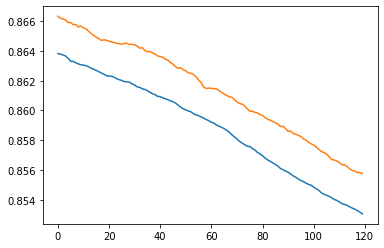

In [94]:
plt.plot(train_scores)
plt.plot(val_scores)

In [95]:
lambda_ = np.argmax(val_scores)
lambda_

0

In [96]:
#calculating best lambda
best_lambda = (0.01 + 100) * lambda_
best_lambda

0.0

In [97]:
#after getting best lambda check it on train data
model = LogisticRegression(C = 1/best_lambda)
model.fit(X_train, y_train)

LogisticRegression(C=inf)

In [98]:
#with help of best lamda get the accuracy on test data
model.score(X_test, y_test)

0.8627376713885312

In [99]:
#get the y_pred as per your model
prediction = model.predict(X_test)

In [100]:
#plot the predictions in confusiomn matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)
cm

array([[ 7886,  7691],
       [ 3181, 60448]], dtype=int64)

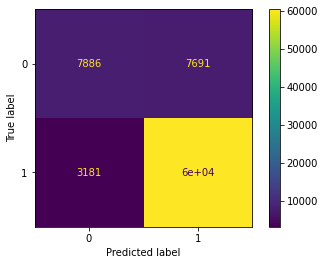

In [101]:
ConfusionMatrixDisplay(cm).plot()

In [102]:
#accuracy from Confusion matrix
accuracy = np.diag(cm).sum()/ cm.sum()
accuracy

0.8627376713885312

In [103]:
#code for precision calculation
from sklearn.metrics import precision_score
precision_score(y_test, prediction)

0.8871277829143369

In [104]:
#code for recall calculation
from sklearn.metrics import recall_score
recall_score(y_test, prediction)

0.9500070722469315

In [105]:
# code for f1 score
from sklearn.metrics import f1_score
f1_score(y_test, prediction).round(2)

0.92

In [106]:
#import roc metric
from sklearn.metrics import roc_curve, roc_auc_score

In [107]:
#get the fpr,tpr and thres for each values
fpr, tpr, thres = roc_curve(y_test, prediction)

Text(0.5, 1.0, 'AU-ROC')

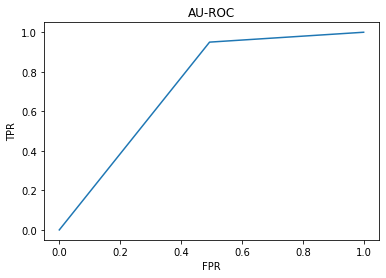

In [108]:
#plot the AU-ROC curve
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AU-ROC")

In [109]:
#get the roc_score for the model
roc_auc_score(y_test, prediction).round(2)

0.73

In [110]:
#overall report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59     15577
           1       0.89      0.95      0.92     63629

    accuracy                           0.86     79206
   macro avg       0.80      0.73      0.75     79206
weighted avg       0.85      0.86      0.85     79206



### <span style="color:red"> F1-score is for used for imbalanced data. 
The data is imbalanced hence we use F1-score to check the accuarcy, **F1-score is 92%** </span>


In [111]:
from sklearn.metrics import precision_recall_curve, auc
precision,recall, thres = precision_recall_curve(y_test, prediction)
precision,recall, thres

(array([0.80333561, 0.88712778, 1.        ]),
 array([1.        , 0.95000707, 0.        ]),
 array([0, 1]))

Text(0.5, 1.0, 'AU-PRC')

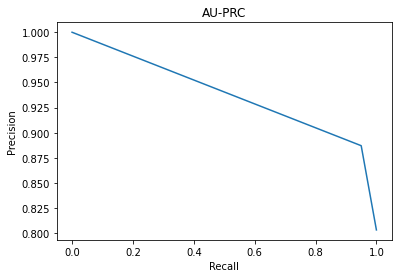

In [112]:
#plot the AU-PRC curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("AU-PRC")

In [113]:
auc(recall,precision).round(2)

0.94

### <span style="color:red"> AU-PRC curve is for used for imbalanced data. 
The data is imbalanced hence we use AU-PRC curve to check the accuarcy, **AU-PRC curve is 94%** </span>

### `Tradeoff Questions:`
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
**Ans: The data is imbalanced, if balanced using weighted sample it may help in reduction of False Positive cases.**

2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
**Ans: The model is highly affected by the job title, title and grade, if this data is accurated then we can avoid disbursing loans to defaulters.**


# `Actionable Insights & Recommendations:`
- Most of the loan amount is between 75000 - 200000
- Most of the interest rate is around 15%
- Most of the installment amounts between 0 - 600
- Annual income range is too high but most of the customer's income is around 10000
- The loan term has only terms i.e 36 and 60 months
- Grade B has the highest count
- Senior Systems Administrator and Federal Bureau of Prisons are the most trusted job titles
- There is no linear correlation as such between numerical columns and loan status
- Grade B has the highest fully paid proportion
- Grade A is more trustable as it has the least defaulters
- Verification details do not play a vital role in the prediction
- Customers who already have a mortgage loan are more likely to pay the loan
- Customers with 10yrs experience are more likely to replay the loan
- The highest loan are taken by the individuals
- The highest loans are issued in Oct month
- In the year 2013 is the most efficient year, as it has the highest loan disbursed and least defaulters
- The highest correlation is seen between installment and loan amount
- Then it is seen between pub_rec and pub_rec_bankruptcies
- Then between total_acc and open_acc
- The loan amount and Installation are related
- Total account and open account are related
- Earliest Credit line and no of mortgage account are negatively related
- The earliest Credit line and total account are negatively related
- Grade and interest rate are highly related
- emp_title is the most important feature

## `Questionnaire:`
1. What percentage of customers have fully paid their Loan Amount?
    - 80.39% customers have paid their Loan Amount
2. Comment about the correlation between Loan Amount and Installment features.
    - Loan amount and installment has the **highest correlation of 95%**, which goes by default as EMI's are related to the total loan amount
3. The majority of people have home ownership as **Mortagage**
4. People with grades ‘A’ are more likely to fully pay their loan - **True**
5. Name the top 2 afforded job titles
    1. Senior Systems Administrator	
    2. Federal Bureau of Prisons
6. Thinking from a bank's perspective, which metric should our primary focus be on..
    - **F1 Score and AU-PRC curve**, as the data is imbalanced
7. How does the gap in precision and recall affect the bank?
    - Banks prefer having less false negative and false positive and both of these play an important role in this industry. A gap in precision and recall will **eventually reduce the F1-score**
8. Which were the features that heavily affected the outcome?
    - emp_title :  (job title)
    - title : The loan title provided by the borrower)
    - sub_grade : LoanTap assigned loan subgrade
    - issue_d : The year which the loan was funded
    - emp_length : Employment length in years
9. Will the results be affected by geographical location? - **No**